# Costumer Prediction

**Author**: Rizal Aditya <br>

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/rzladitya/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/hujikan2)](https://github.com/hujikan2)
-----

## Context

A customer event is an alternative that may be more expensive than participating in a fair, but the profitability is many times higher. People invited and operating in the field will come to the event. Achieving contact with quality is significantly higher.

A customer event is a good place to emphasize the latest biggest achievements, present new products, or keep good contact in a cozy-free atmosphere with your customers and partners. Why not invite to the event all of the potential customers with whom it is good to speak on-site.

## Task
As a data scientist, we will help activists who hold events to increase profits from selling products that are exhibited at the event.
With the help of computers, we will create machine learning models that can predict whether customers who come to the event will buy the products that we show at the event.

what are you waiting for, let's create a machine learning model that can increase the profit performance of these events. Ⓜ


# Import Libary


first we will import the library that will be used in the visualization process (explore data), data preprocessing and modeling.

In [53]:
import pandas as pd
import numpy as np
import panel as pn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score,  f1_score, accuracy_score


In [54]:
# import dataset
df = pd.read_csv("dataset/first question/user-events.csv")
df_copy = df.copy()

In [55]:
# Show 5 rows
df_copy.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [56]:
# Show information about dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [57]:
df_copy[df_copy['product_id'] == 1996170]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.9,1515915625519388267,LJuJVLEjPT
187534,2020-10-31 14:42:55 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.9,1515915625532667068,xC3lZ9hvhF


In [58]:
df_copy[df_copy['category_id'] == 2144415926932472027]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
102,2020-09-24 12:19:57 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
179,2020-09-24 12:37:32 UTC,view,139268,2144415926932472027,computers.components.cooler,deepcool,11.86,1515915625519403527,jEw88TGY4L
275,2020-09-24 12:58:06 UTC,view,139139,2144415926932472027,computers.components.cooler,deepcool,14.37,1515915625519410912,yEomOdZ8tV
390,2020-09-24 13:26:52 UTC,view,4170362,2144415926932472027,computers.components.cooler,lenovo,63.00,1515915625519421517,ZCQiL1rOoO
...,...,...,...,...,...,...,...,...,...
884651,2021-02-28 20:49:05 UTC,view,3721153,2144415926932472027,computers.components.cooler,id-cooling,83.67,1515915625556415986,y4qlcVYAkj
884655,2021-02-28 20:49:32 UTC,view,3721153,2144415926932472027,computers.components.cooler,id-cooling,83.67,1515915625556415986,y4qlcVYAkj
884656,2021-02-28 20:49:51 UTC,view,3721153,2144415926932472027,computers.components.cooler,id-cooling,83.67,1515915625556415986,y4qlcVYAkj
884771,2021-02-28 21:15:16 UTC,view,4101087,2144415926932472027,computers.components.cooler,aerocool,17.19,1515915625611003878,XVqEYy9tP7


## Convert datatype and add extract data add to new columns

In [59]:
# convert dtype 'event_time' to datetime in pandas
# using pd.to_datetime for convert
df_copy['event_time'] = pd.to_datetime(df_copy['event_time'],  infer_datetime_format=True)

# next create new columns
# extract data from df['ecevent_time']
# i.o 'year', 'month', 'date', 'hour'
df_copy['year'] = df_copy['event_time'].dt.year
df_copy['month'] = df_copy['event_time'].dt.month_name()
df_copy['date'] = df_copy['event_time'].dt.day_name()
df_copy['hour'] = df_copy['event_time'].dt.hour

# next drop columns 'event_time'
df_copy.drop(columns=['event_time'], axis=1, inplace=True)

In [60]:
# splitting 'category_code' column into Two columns
# i.e. 'category' and 'product_name'respectively and
# Adding these columns to the existing dataframe.
df_copy['category'] = df_copy['category_code'].astype(str).apply(lambda x: x.split('.')[0]) # Split data from category_code and add new column category 
df_copy['product_name'] = df_copy['category_code'].astype(str).apply(lambda x: x.split('.')[-1]) # Split data form category_code and add new columns product_name
df_copy.drop(columns=['category_code'], axis=1, inplace=True) # dropp colum 'category_code'


After we saw the 5 rows of data, I thought of directly extracting the data in order to add the features we want.

## Check Duplicated Data and Handling duplicated data


<img src="https://res.cloudinary.com/hevo/images/f_auto,q_auto/v1649077632/hevo-learn/duplicate-data-1/duplicate-data-1.png?_i=AA" width=100%>

Duplicate data is any record that inadvertently shares data with another record in a Database. Duplicate data is easy to spot and it mostly occurs when transferring data between systems.

The most popular occurrence of duplicate data is a complete carbon copy of a record. Partial duplicates are also common in organizations. These are records with the same Name, Email, Phone Number, or Address, but with other non-matching data. If not dealt with, duplicate records can be harmful to your business.

Duplicate records make your data dirty. Any reports generated from such data will not be accurate, hence, businesses cannot rely on them to make sound decisions. Now, let's discuss how duplicate data harms your business.

In [63]:
# Check Duplicate Data
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = df_copy[df_copy.duplicated()]

print("Duplicate Rows :")
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,event_type,product_id,category_id,brand,price,user_id,user_session,year,month,date,hour,category,product_name
11,view,811491,2144415926370435276,ritmix,33.32,1515915625356205647,aFLc6y9kn4,2020,September,Thursday,11,nan,nan
25,view,1021484,2144415944976368325,NaN,202.98,1515915625519389101,fO4BG6BTMi,2020,September,Thursday,12,nan,nan
47,view,3536864,2144415935732122060,sirius,47.14,1515915625519382571,Ve8a3LzDoI,2020,September,Thursday,12,nan,nan
49,view,261923,2144415922939494519,panasonic,37.75,1515915625519388006,17S2LXOG91,2020,September,Thursday,12,nan,nan
51,view,3536864,2144415935732122060,sirius,47.14,1515915625519382571,Ve8a3LzDoI,2020,September,Thursday,12,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885082,purchase,500058,2144415923107266682,pantum,67.00,1515915625610973155,CxMKMQDRAN,2021,February,Sunday,23,computers,printer
885090,purchase,500058,2144415923107266682,pantum,67.00,1515915625610973155,CxMKMQDRAN,2021,February,Sunday,23,computers,printer
885115,view,456167,2144415939205005866,NaN,66.08,1515915625606625929,o6Am83NAYk,2021,February,Sunday,23,auto,window
885120,view,622796,2144415922738167921,asus,147.38,1515915625572947504,LJ4H6CRcME,2021,February,Sunday,23,computers,cdrw


In [64]:
# Drop dulicate data
df = df_copy.drop_duplicates(keep=False,inplace=True)

## Check Missing value data and handling missing values

**Types of missing data**

|Type|Definition|
|---|---
|Missing completely at random (MCAR)|Missing data are randomly distributed across the variable and unrelated to other variables.|
|Missing at random (MAR)|Missing data are not randomly distributed but they are accounted for by other observed variables.|
|Missing not at random (MNAR)|Missing data systematically differ from the observed values.|

Type missing in this data **MAR**

In [66]:
# Replace 'unknown', `999` , and `nonexistent` to nan
df_copy.replace('nan', np.nan, inplace=True)

In [67]:
# Show percentage missing values
(df_copy.isnull().sum() / len(df_copy) * 100).sort_values(ascending=False).head()

category        27.340310
product_name    27.340310
brand           24.185870
user_session     0.021896
event_type       0.000000
dtype: float64

In [68]:
# Drop missing value
df_copy.dropna(axis=0, inplace=True)

In [69]:
# show data
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389693 entries, 1 to 885128
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   event_type    389693 non-null  object 
 1   product_id    389693 non-null  int64  
 2   category_id   389693 non-null  int64  
 3   brand         389693 non-null  object 
 4   price         389693 non-null  float64
 5   user_id       389693 non-null  int64  
 6   user_session  389693 non-null  object 
 7   year          389693 non-null  int64  
 8   month         389693 non-null  object 
 9   date          389693 non-null  object 
 10  hour          389693 non-null  int64  
 11  category      389693 non-null  object 
 12  product_name  389693 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 41.6+ MB


# Show information dataset (dataset after cleaning)

In [71]:
df_ori = df.copy() # Copy  data original
df = df_copy.copy() # Copy data after clean
print(f"Total row in dataset : {df.shape[0]}")
print(f"Total column in dataset : {df.shape[1]}")
df.sample(5, random_state=0) # show 5 data randomly

Total row in dataset : 389693
Total column in dataset : 13


,event_type,product_id,category_id,brand,price,user_id,user_session,year,month,date,hour,category,product_name
576212,view,4026795,2144415927049912542,bbk,167.62,1515915625591195581,n273A27121,2021,January,Saturday,18,electronics,tv
408083,view,3797823,2144415939364389423,smarterra,20.95,1515915625553442866,YuMg7GsHYB,2020,December,Monday,15,electronics,clocks
484106,view,1674234,2144415922587172973,araree,10.62,1515915625566960830,emtS1V5rFX,2020,December,Tuesday,9,electronics,telephone
399651,cart,1694779,2144415924491387038,gigabyte,90.17,1515915625541130254,g14p0daQ2f,2020,December,Saturday,13,computers,motherboard
462258,view,1651980,2144415928845074703,topon,18.41,1515915625564772061,Naeuy1tANQ,2020,December,Friday,10,computers,notebook


In [72]:
# Show information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389693 entries, 1 to 885128
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   event_type    389693 non-null  object 
 1   product_id    389693 non-null  int64  
 2   category_id   389693 non-null  int64  
 3   brand         389693 non-null  object 
 4   price         389693 non-null  float64
 5   user_id       389693 non-null  int64  
 6   user_session  389693 non-null  object 
 7   year          389693 non-null  int64  
 8   month         389693 non-null  object 
 9   date          389693 non-null  object 
 10  hour          389693 non-null  int64  
 11  category      389693 non-null  object 
 12  product_name  389693 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 41.6+ MB


# Next, We start with EDA(Exploratory Data Analysis)

<img src="https://media.giphy.com/media/HUplkVCPY7jTW/giphy.gif">

## First Question should be why do we need this ??
- How is the data distribution?
- What types of product categories are most viewed in events? Of course, it will greatly affect the results of purchases made by customers or users who visit the event.
- Seeing in which month the most customers or visitors made purchases?
- See what days of the week the most customers or visitors make purchases?

## **Show distibution of event type** 

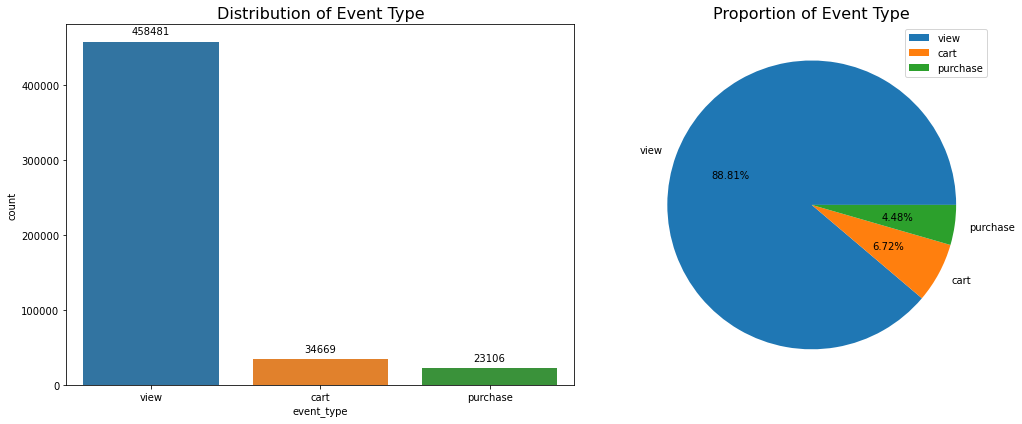

In [15]:
# membuat figure
plt.figure(figsize=(15,6))

# plot countplot
plt.subplot(1,2,1)
p1 = sns.countplot(data=df, x='event_type')
plt.title("Distribution of Event Type", fontsize='16')
for p in p1.patches:
    p1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# plot pie chart
plt.subplot(1,2,2)
plt.pie(df['event_type'].value_counts(), labels=list(df['event_type'].unique()), autopct='%.2f%%')
plt.title("Proportion of Event Type", fontsize='16')
plt.legend()
plt.tight_layout()
plt.show()

From the results of the pie chart information above, we can conclude that customers are more dominant in viewing products than making purchases. And we can also see that those who cart do not make conversions in terms of purchases. It can also be seen that the percentage figure obtained from this data shows that the type of customer only looks around at 88%, while the customer or people who come to make a purchase are only 4%.

## Show Rank top category and product by view

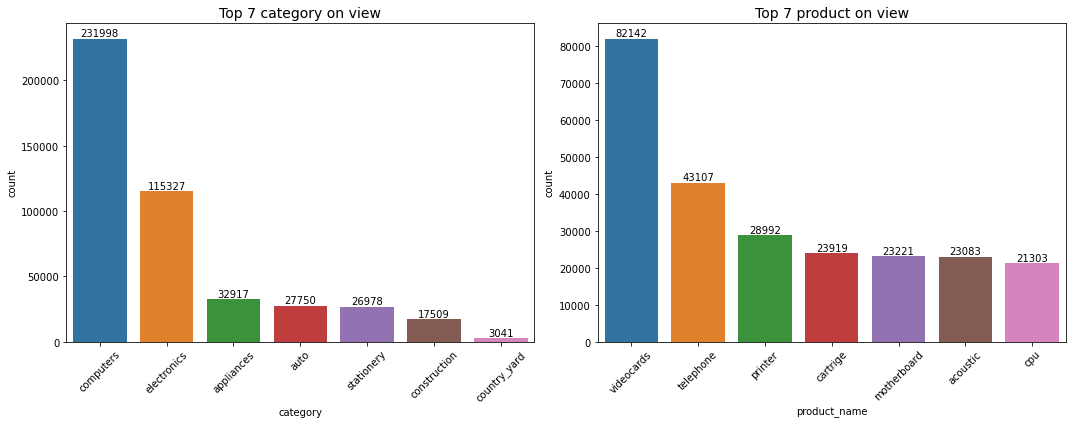

In [16]:
# melakukan filter
df_view_type = df[df['event_type'] == 'view']

plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
ax = sns.countplot(
    x = df_view_type["category"],
    order = df_view_type["category"].value_counts().head(7).sort_values(ascending = False).index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.title("Top 7 category on view", fontsize = "14")

plt.subplot(1,2,2)
ax = sns.countplot(
    x = df_view_type["product_name"],
    order = df_view_type["product_name"].value_counts().head(7).sort_values(ascending = False).index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.title("Top 7 product on view", fontsize = "14")
plt.tight_layout()
plt.show()

From the visualization information above, regarding the types of customers who only look around, the most common categories are:
- computer
- electronics
- appliances

while the products that are often seen are:
- videocards
- telephone
- printer

## Show Rank top category and product by cart

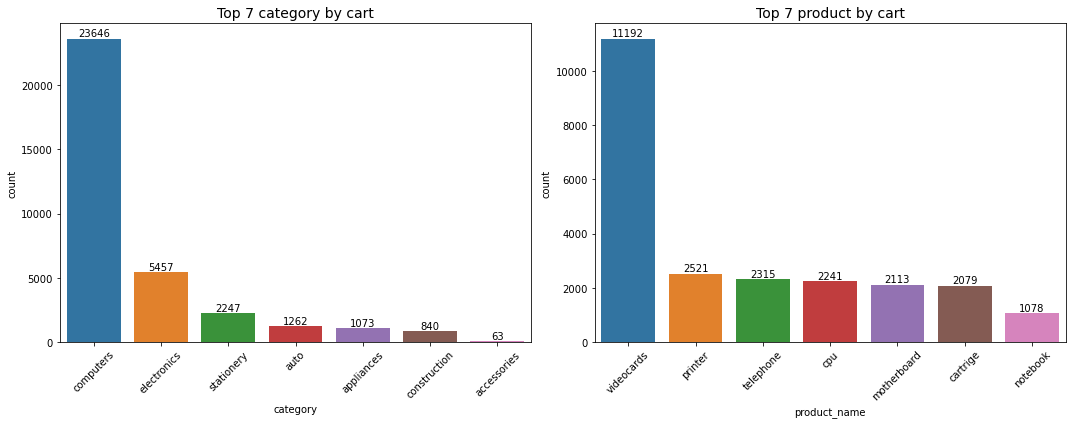

In [17]:
# melakukan filter
df_cart_type = df[df['event_type'] == 'cart']

plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
ax = sns.countplot(
    x = df_cart_type["category"],
    order = df_cart_type["category"].value_counts().head(7).sort_values(ascending = False).index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.title("Top 7 category by cart", fontsize = "14")

plt.subplot(1,2,2)
ax = sns.countplot(
    x = df_cart_type["product_name"],
    order = df_cart_type["product_name"].value_counts().head(7).sort_values(ascending = False).index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.title("Top 7 product by cart", fontsize = "14")
plt.tight_layout()
plt.show()

From the visualization information above, regarding the types of customers who only cart(whatclist), the most common categories are:
- computer
- electronics
- stationey 
a little difference with above

while the products that are often seen are:
- videocards
- printer
- telephone


## Show Rank top category and product by purchase

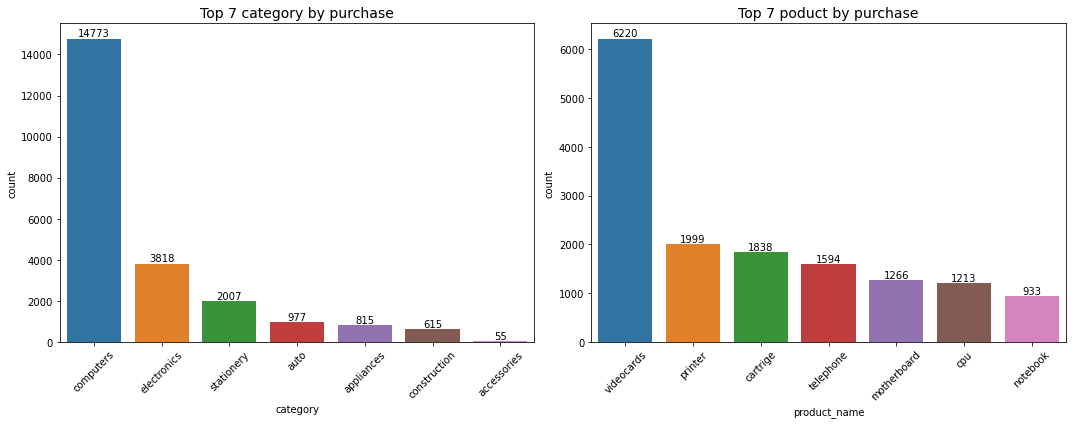

In [18]:
# melakukan filter
df_purchase_type = df[df['event_type'] == 'purchase']

plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
ax = sns.countplot(
    x = df_purchase_type["category"],
    order = df_purchase_type["category"].value_counts().head(7).sort_values(ascending = False).index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.title("Top 7 category by purchase", fontsize = "14")

plt.subplot(1,2,2)
ax = sns.countplot(
    x = df_purchase_type["product_name"],
    order = df_purchase_type["product_name"].value_counts().head(7).sort_values(ascending = False).index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.title("Top 7 poduct by purchase", fontsize = "14")
plt.tight_layout()
plt.show()

From the visualization information above, regarding the types of customers who purchases, the most common categories are:
- computer
- electronics
- stationey 

while the products that are often seen are:
- videocards
- printer
- cartrige


## Showing distibution event type base on top category

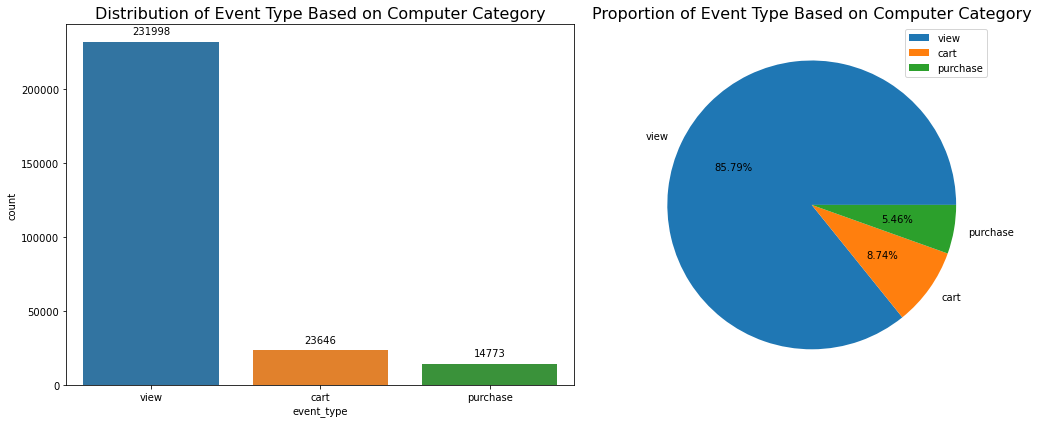

In [19]:
# Filtering based on top category
data_comp = df[df['category'] == 'computers']

# membuat figure
plt.figure(figsize=(15,6))

# plot countplot
plt.subplot(1,2,1)
p1 = sns.countplot(data=data_comp, x='event_type')
plt.title("Distribution of Event Type Based on Computer Category", fontsize='16')
for p in p1.patches:
    p1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# plot pie chart
plt.subplot(1,2,2)
plt.pie(data_comp['event_type'].value_counts(), labels=list(data_comp['event_type'].unique()), autopct='%.2f%%')
plt.title("Proportion of Event Type Based on Computer Category", fontsize='16')
plt.legend()
plt.tight_layout()
plt.show()

## Showing distibution event type base on top product

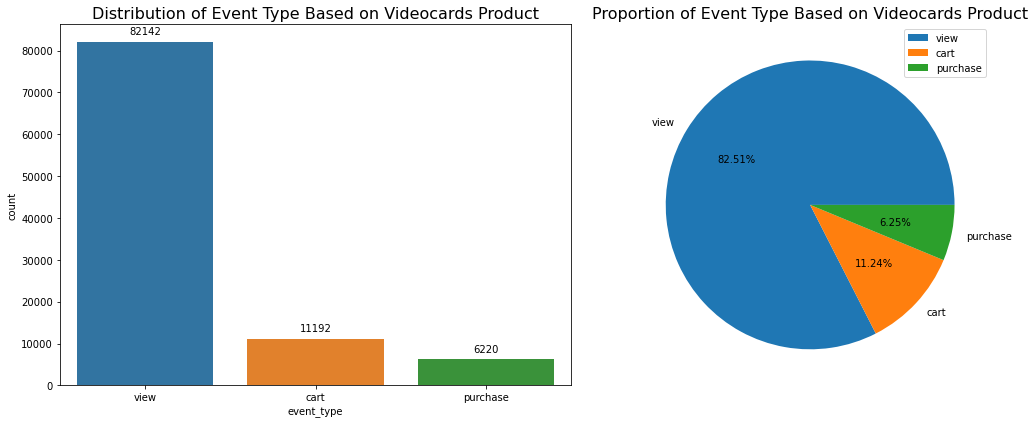

In [20]:
# Filtering based on top category
data_comp = df[df['product_name'] == 'videocards']

# membuat figure
plt.figure(figsize=(15,6))

# plot countplot
plt.subplot(1,2,1)
p1 = sns.countplot(data=data_comp, x='event_type')
plt.title("Distribution of Event Type Based on Videocards Product", fontsize='16')
for p in p1.patches:
    p1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# plot pie chart
plt.subplot(1,2,2)
plt.pie(data_comp['event_type'].value_counts(), labels=list(data_comp['event_type'].unique()), autopct='%.2f%%')
plt.title("Proportion of Event Type Based on Videocards Product", fontsize='16')
plt.legend()
plt.tight_layout()
plt.show()

## Show distribution costumer view and purchasing on month

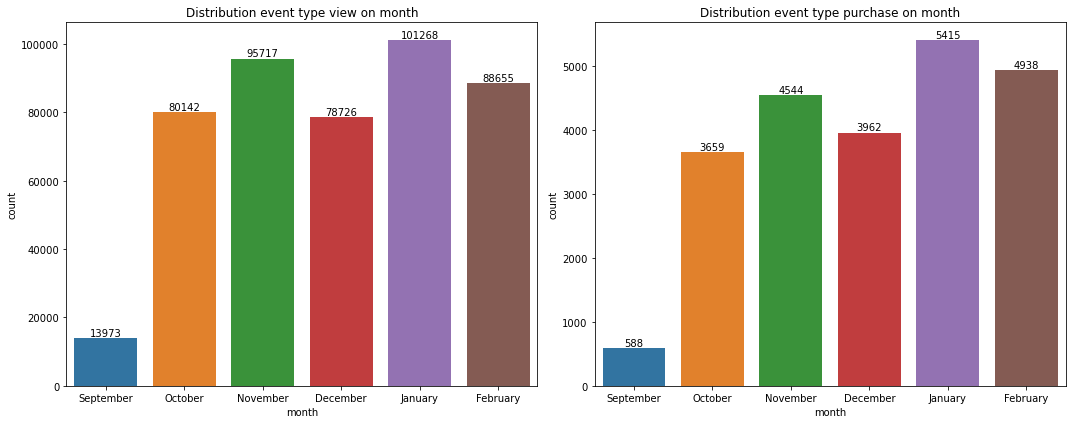

In [21]:
# Add figure for plotting
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1) # Subplot for plotting 
ax = sns.countplot(data=df_view_type,
                  x='month')
ax.bar_label(ax.containers[0])
plt.title("Distribution event type view on month")

# Subplot for plotting
plt.subplot(1,2,2)
ax = sns.countplot(data=df_purchase_type,
                  x='month')
ax.bar_label(ax.containers[0])
plt.title("Distribution event type purchase on month")
plt.tight_layout()
plt.show()

## Show distribution costumer view and purchasing on date

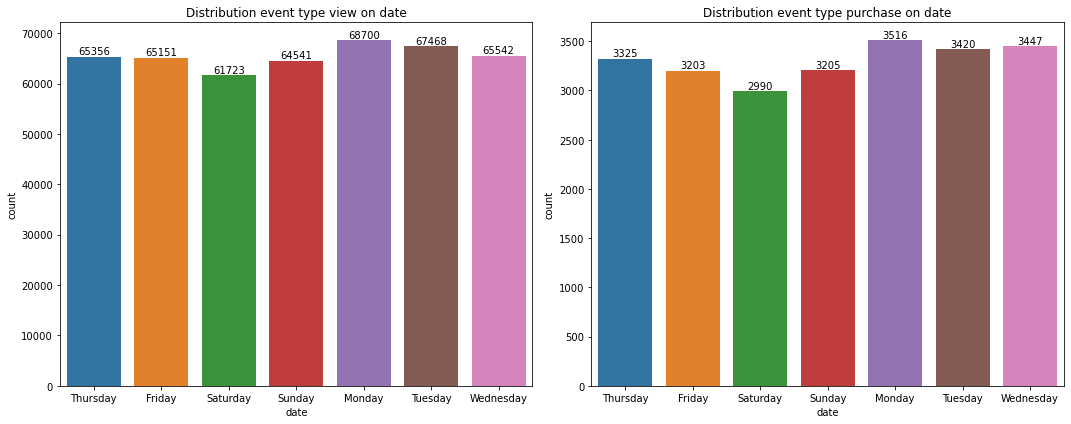

In [22]:
# Add figure for plotting
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1) # Subplot for plotting 
ax = sns.countplot(data=df_view_type,
                  x='date')
ax.bar_label(ax.containers[0])
plt.title("Distribution event type view on date")

# Subplot for plotting
plt.subplot(1,2,2)
ax = sns.countplot(data=df_purchase_type,
                  x='date')
ax.bar_label(ax.containers[0])
plt.title("Distribution event type purchase on date")
plt.tight_layout()
plt.show()

Then we get the information above, that customers are more dominant in hunting or purchasing at the end of the year.

This is very closely related, because usually at the end of the year, many electronic goods are discounted. and it is also seen that their electronic or computer goods are the most in demand

# Data Preprocessing

## Check Missing Data


In [23]:
# Check missing data
df.isnull().sum()

event_type      0
product_id      0
category_id     0
brand           0
price           0
user_id         0
user_session    0
year            0
month           0
date            0
hour            0
category        0
product_name    0
dtype: int64

## Check Cardinality Data & Handling Cardinality data

Almost all datasets now have categorical variables. Each categorical variable consists of unique values. A categorical feature is said to possess high cardinality when there are too many of these unique values. One-Hot Encoding becomes a big problem in such a case since we have a separate column for each unique value (indicating its presence or absence) in the categorical variable. This leads to two problems, one is obviously space consumption, but this is not as big a problem as the second problem, the curse of dimensionality.

[source: towardsdatascience](https://towardsdatascience.com/dealing-with-features-that-have-high-cardinality-1c9212d7ff1b)

### Check Carfinality Data

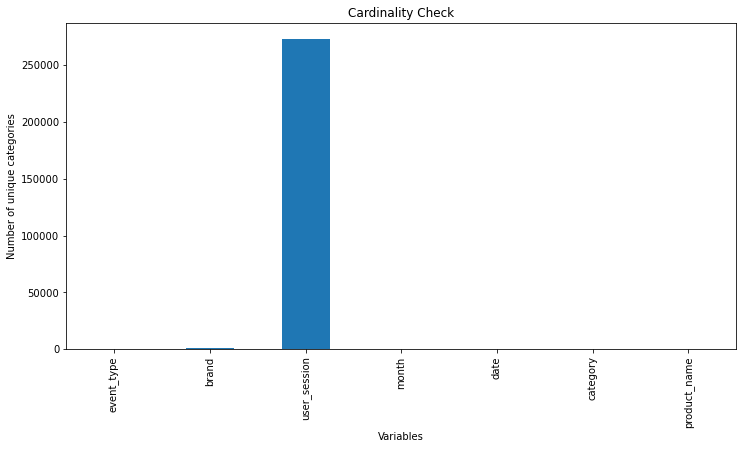

In [24]:
# Select data categorical
df_object = df_copy.select_dtypes(include=['object'])
df_object.nunique().plot.bar(figsize=(12,6))
plt.ylabel("Number of unique categories")
plt.xlabel("Variables")
plt.title("Cardinality Check")
plt.show()

### Drop Cardinality data 

Because, we can see data `user_session` is generic by sistem however we not use to create model. So i'm gona dropped this column

In [25]:
# We can dropped column 'user_session'
df_copy.drop(['user_session'], axis=1, inplace=True)

### Show and check cardinality again

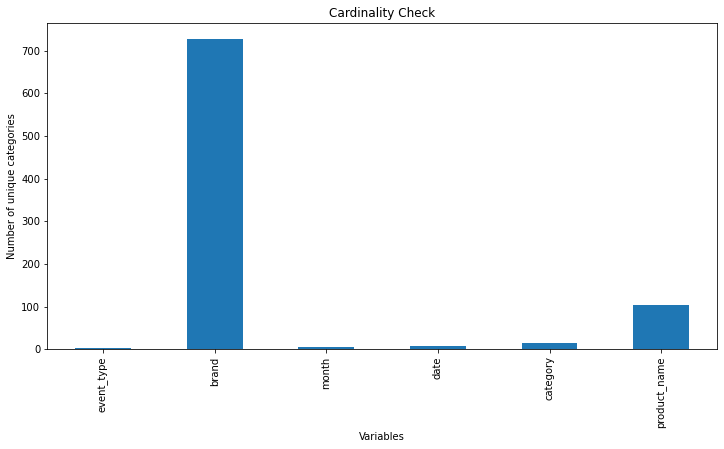

In [26]:
# Select data categorical
df_object = df_copy.select_dtypes(include=['object'])
# Next we will check again
df_object.nunique().plot.bar(figsize=(12,6))
plt.ylabel("Number of unique categories")
plt.xlabel("Variables")
plt.title("Cardinality Check")
plt.show()

After we check again, we find 2 column high cardinality is `brand` and `product_name`. We can handle by value count top 15 

In [27]:
# Change and keep top 15 brand name
def modif_brand(x):
    if x in ['gigabyte', 'asus', 'msi', 'palit', 'amd', 'samsung', 'canon', 'hp', 'sirius', 'sapphire', 'asrock', 'pioneer', 'epson', 'bbk', 'topon']:
        return x
    else:
        return "other"
    
# Change and keep top 15 product name
def modif_product(a):
    if a in ['videocards', 'telephone', 'printer', 'cartrige', 'motherboard', 'acoustic', 'cpu', 'tv', 'notebook', 'player', 'tablet', 'vacuum', 'power_supply', 'cooler', 'headphone']:
        return a
    else:
        return "other"

In [28]:
# Next use apply function pandas for handling 
df_copy['brand'] = df_copy.brand.apply(modif_brand) # handling cardinality in data brand
df_copy['product_name'] = df_copy.product_name.apply(modif_product) # handling cardinality in data product name

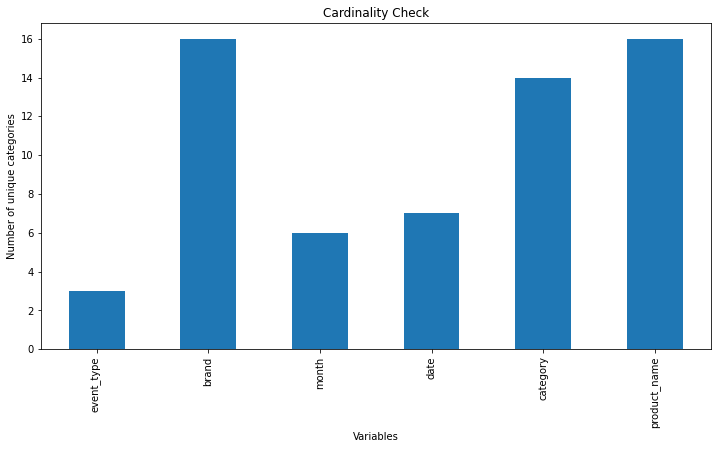

In [29]:
# Select data categorical
df_object = df_copy.select_dtypes(include=['object'])
# Next we will check again
df_object.nunique().plot.bar(figsize=(12,6))
plt.ylabel("Number of unique categories")
plt.xlabel("Variables")
plt.title("Cardinality Check")
plt.show()

## Train Test Split Data

In [30]:
# define 'X' and 'y'
X = df_copy.drop(['event_type'], axis=1)
y = df_copy['event_type']

# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=44, stratify=y)

# Cek dimensi Train dan Test
print('---- Train - Set ----')
print('Dimensi dari X_train :', X_train.shape)
print('Dimensi dari y_train :', y_train.shape)
print('')
print('---- Test - Set ----')
print('Dimensi dari X_test :', X_test.shape)
print('Dimensi dari y_test :', y_test.shape)

---- Train - Set ----
Dimensi dari X_train : (413004, 11)
Dimensi dari y_train : (413004,)

---- Test - Set ----
Dimensi dari X_test : (103252, 11)
Dimensi dari y_test : (103252,)


In [31]:
# Drop Uncessery data
X_train.drop(['category_id', 'product_id', 'user_id'], axis=1, inplace=True)
X_test.drop(['category_id', 'product_id', 'user_id'], axis=1, inplace=True)

### Split data numerical and categorical data


In [32]:
## Split data Kategorik and Numerical
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()
print("Numerical Columns :", num_columns)
print("Categorical Columns :", cat_columns)

Numerical Columns : ['price', 'year', 'hour']
Categorical Columns : ['brand', 'month', 'date', 'category', 'product_name']


## Encoding for categorical data

In [33]:
# Inititate Encoder
le = LabelEncoder()
for col in cat_columns:
    le.fit(X_train[col])
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    
# encode for y_labels    
y_train = y_train.replace({'view':0, 'cart':1, 'purchase':2})
y_test = y_test.replace({'view':0, 'cart':1, 'purchase':2})

## Scaling for numercal data

In [34]:
# Initaiate Scaler
scaler = StandardScaler()
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

# Modeling

## 1. Define Model Logistic Regression (default params)

In [35]:
# Import module 
from sklearn.linear_model import LogisticRegression
# Define Model 
clf_log = LogisticRegression()

# Training Model Logistic Regression to data train
clf_log.fit(X_train, y_train)


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 2. Define Model KNN (default params)

In [36]:
# Import Model
from sklearn.neighbors import KNeighborsClassifier

# Define Model
clf_knn = KNeighborsClassifier()

# Training Model KneighboarsClassifier
clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

## 3. Define Model Decision Tree (default params)

In [37]:
# Import Model from sklearn
from sklearn.tree import DecisionTreeClassifier

# Define Model
clf_dc = DecisionTreeClassifier()

# Training model DecisionTree
clf_dc.fit(X_train, y_train)

DecisionTreeClassifier()

## 4. Define Model Random Forest (default params)

In [38]:
# Import Model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Define Model
clf_rf = RandomForestClassifier()

# Training Model RandomForestClassifier
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

# Evaluation Model

## Choosing the best Evaluation Matrix:

If we talk about classification problems, the most common metrics used are:
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under the ROC (Receiver Operating Characteristic) curve or simply AUC (AUC):
    - If we calculate the area under the ROC curve, we are calculating another metric which is used very often when you have a dataset which has skewed binary targets. This metric is known as the Area Under ROC Curve or Area Under Curve or just simply AUC. There are many ways to calculate the area under the ROC curve
    - AUC is a widely used metric for skewed binary classification tasks in the industry,and a metric everyone should know about

- Log loss
    > Log Loss = - 1.0 * ( target * log(prediction) + (1 - target) * log(1 - prediction) )

Most of the metrics that we discussed until now can be converted to a multi-class version. The idea is quite simple. Let’s take precision and recall. We can calculate precision and recall for each class in a multi-class classification problem

- **Mcro averaged precision**: calculate precision for all classes individually and then average them
- **Micro averaged precision**: calculate class wise true positive and false positive and then use that to calculate overall precision
- **Weighted precision**: same as macro but in this case, it is weighted average depending on the number of items in each class

<img src="https://cdn-images-1.medium.com/max/800/1*1WPbfzztdv50V22TpA6njw.png">


In [48]:
# Plot Evaluate Model
def plot_roc_and_precision_recall(y_true, y_score):
  # Get ROC curve FPR and TPR from true labels vs score values
  fpr, tpr, _ = roc_curve(y_true, y_score)

  # Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
  roc_auc = auc(fpr, tpr)

  # Calculate precision and recall from true labels vs score values
  precision, recall, _ = precision_recall_curve(y_true, y_score)

  plt.figure(figsize=(8, 3))

  plt.subplot(1,2,1)
  lw = 2
  plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (AUC = %0.4f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.grid(True)

  plt.subplot(1,2,2)
  plt.step(recall, precision, color='orange', where='post')
  # plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('Precision Recall Curve')
  plt.grid(True)

  left  = 0.125  # the left side of the subplots of the figure
  right = 0.9    # the right side of the subplots of the figure
  bottom = 0.1   # the bottom part of the subplots of the figure
  top = 0.9      # the top part of the subplots of the figure
  wspace = 0.5   # the amount of width reserved for blank space between subplots
  hspace = 0.2   # the amount of height reserved for white space between subplots
  plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
  plt.show()

    

accuracy_train = []
accuracy_test = []
precision = []
recall = []
f_1_score = []

def evalute_model(list_model):
    for s_clf in list_model:
        # model predict for data Train and Test
        clf = eval(s_clf)
        y_pred_train = clf.predict(X_train).astype(int) # returns a class decision based on the value of the predicted probability
        y_pred = clf.predict(X_test).astype(int) # returns a class decision based on the value of the predicted probability
        y_score = clf.predict_proba(X_test) # returns the value of the predicted probability

        # Add to list all metrics avaluasi
        accuracy_train.append(round(accuracy_score(y_train, y_pred_train),2)) # add to list accuracy score from train dataset
        accuracy_test.append(round(accuracy_score(y_test, y_pred),2)) # add to list accuracy score from test dataset
        precision.append(round(precision_score(y_test, y_pred, average='micro'),2)) # add precision score from test dataset
        recall.append(round(recall_score(y_test, y_pred, average='micro'),2)) # add recal score from test dataset
        f_1_score.append(round(f1_score(y_test, y_pred, average='micro'),2)) # add f1-score from test dataset
    
        print("CONFUSION MATRIX: " + s_clf)
        print('-'*35)
        ax = plt.subplot()
        cm = confusion_matrix(y_test, y_pred) # Create confusion matrix
        sns.heatmap(cm, annot=True, fmt='g', ax=ax);
        # labels, title and ticks
        ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
        ax.set_title('Confusion Matrix'); 
        plt.show()
        print()
        print('Classification Report: ' + s_clf) 
        print('-'*35)
        print(classification_report(y_test, y_pred)) # evaluate model using classification report
        print()
        print("="*50)

CONFUSION MATRIX: clf_log
-----------------------------------


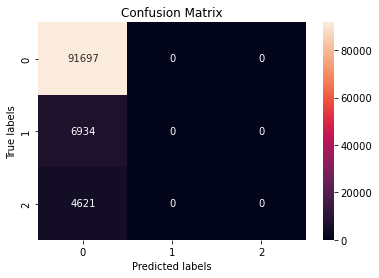


Classification Report: clf_log
-----------------------------------
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     91697
           1       0.00      0.00      0.00      6934
           2       0.00      0.00      0.00      4621

    accuracy                           0.89    103252
   macro avg       0.30      0.33      0.31    103252
weighted avg       0.79      0.89      0.84    103252




C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CONFUSION MATRIX: clf_knn
-----------------------------------


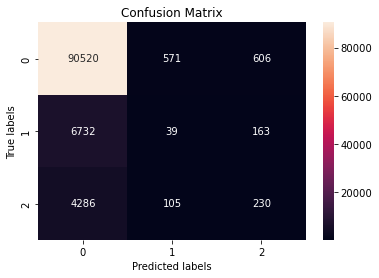


Classification Report: clf_knn
-----------------------------------
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     91697
           1       0.05      0.01      0.01      6934
           2       0.23      0.05      0.08      4621

    accuracy                           0.88    103252
   macro avg       0.39      0.35      0.34    103252
weighted avg       0.81      0.88      0.84    103252


CONFUSION MATRIX: clf_dc
-----------------------------------


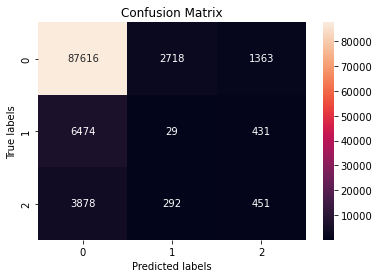


Classification Report: clf_dc
-----------------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     91697
           1       0.01      0.00      0.01      6934
           2       0.20      0.10      0.13      4621

    accuracy                           0.85    103252
   macro avg       0.37      0.35      0.35    103252
weighted avg       0.80      0.85      0.83    103252


CONFUSION MATRIX: clf_rf
-----------------------------------


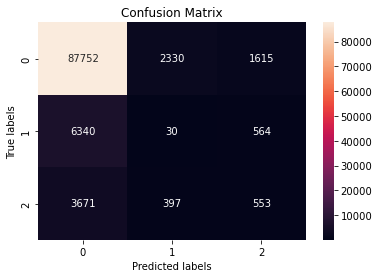


Classification Report: clf_rf
-----------------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     91697
           1       0.01      0.00      0.01      6934
           2       0.20      0.12      0.15      4621

    accuracy                           0.86    103252
   macro avg       0.37      0.36      0.36    103252
weighted avg       0.81      0.86      0.83    103252




In [49]:
evalute_model(['clf_log', 'clf_knn', 'clf_dc', 'clf_rf'])

In [50]:
# Make dataframe for metriks eval
model_default = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],
                          'Train Accuracy' : accuracy_train,
                          'Test Accuracy': accuracy_test,
                          'Precison': precision,
                          'Recall': recall,
                          'F1 SCORE': f_1_score})

# Sort metriks recall in ASC
model_default.sort_values(by='Recall', ascending=False)

,Model,Train Accuracy,Test Accuracy,Precison,Recall,F1 SCORE
0,Logistic Regression,0.89,0.89,0.89,0.89,0.89
1,KNN,0.89,0.88,0.88,0.88,0.88
3,Random Forest,0.90,0.86,0.86,0.86,0.86
2,Decision Tree,0.90,0.85,0.85,0.85,0.85


From the results of the evaluation of the metrics used, we can see the performance of the model using the default parameters.

The model is able to classify well, but if we look further from the results of the confusion matrix, the logistic regression model is not able to work well in terms of making predictions. Although the logistic regression model has good evaluation metric results.

# Tuning Model

## Hyperparameter optimization
In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data. The objective function takes a tuple of hyperparameters and returns the associated loss. Cross-validation is often used to estimate this generalization performance.

## Approaches

### **Grid search**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Hyperparameter_Optimization_using_Grid_Search.svg/220px-Hyperparameter_Optimization_using_Grid_Search.svg.png" width=40%>

Grid search across different values of two hyperparameters. For each hyperparameter, 10 different values are considered, so a total of 100 different combinations are evaluated and compared. Blue contours indicate regions with strong results, whereas red ones show regions with poor results.

### **Random search**


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Hyperparameter_Optimization_using_Random_Search.svg/220px-Hyperparameter_Optimization_using_Random_Search.svg.png" width=40%>

Random search across different combinations of values for two hyperparameters. In this example, 100 different random choices are evaluated. The green bars show that more individual values for each hyperparameter are considered compared to a grid search.


Source : Wikipedia [Hyperparameter](https://en.wikipedia.org/wiki/Hyperparameter_optimization)

## Logistic Regression Tuning

### Tuning parameter **Ligistic Regression** Using `Random Search`

In [ ]:
import time
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# define models and parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01]

# define random search
grid = {'solver': solvers,
        'penalty': penalty,
        'C': c_values
}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
rs_log = RandomizedSearchCV(estimator=clf_log, param_distributions=grid, n_jobs=-1, cv=cv, scoring='recall',random_state=42, error_score=0, verbose=True)
%time rs_log.fit(X_train, y_train) # Fit the random

# summarize results
print("Best: %f using %s" % (rs_log.best_score_, rs_log.best_params_))
means = rs_log.cv_results_['mean_test_score']
stds = rs_log.cv_results_['std_test_score']
params = rs_log.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### After Tuning using `Random Search` next we will tuning use `Grid Search`

In [ ]:
# Create grid parameter for GridSearch
grid_param = {
    'solver':[rs_log.best_params_['solver']],
    'penalty':[rs_log.best_params_['penalty']],
    'C':[1000, 100, 10, 1, 0.1, 0.01, 0.001]
}
# Define Cross Validation 
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
gs_log = GridSearchCV(estimator=clf_log, param_grid=grid_param, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0, verbose=True)
%time gs_log.fit(X_train, y_train) # Training Model Grid Params

# summarize results
print("Best: %f using %s" % (gs_log.best_score_, gs_log.best_params_))
means = gs_log.cv_results_['mean_test_score']
stds = gs_log.cv_results_['std_test_score']
params = gs_log.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## KNN Tuning

###  Tuning parameter **KNN** Using `Random Search`

In [ ]:
# Use the random grid to search for best hyperparameters
weights = ['uniform', 'distance'] # define parameter to list for tunning
n_neighbors = [2, 3, 5, 7, 8, 10, 15] # define parameter ti list for tunning

# define random search
grid = {'weights': weights,
        'n_neighbors': n_neighbors
}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
rs_knn = RandomizedSearchCV(estimator=clf_knn, param_distributions=grid, n_jobs=-1, cv=cv, scoring='recall',random_state=42, error_score=0, verbose=True)
%time rs_knn.fit(X_train, y_train) # Fit the random

# summarize results
print("Best: %f using %s" % (rs_knn.best_score_, rs_knn.best_params_))
means = rs_knn.cv_results_['mean_test_score']
stds = rs_knn.cv_results_['std_test_score']
params = rs_knn.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

###  Tuning parameter **KNN** Using `GridSearch`

In [ ]:
# Create parameter for gridserch 
param_grid = {
    'weights':[rs_knn.best_params_['weights']],
    'n_neighbors': [2,3,4,5]
}

# Define Cross Validation 
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
gs_knn = GridSearchCV(estimator=clf_knn, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0, verbose=True)
%time gs_knn.fit(X_train, y_train) # Training Model Grid Params

# summarize results
print("Best: %f using %s" % (gs_knn.best_score_, gs_knn.best_params_))
means = gs_knn.cv_results_['mean_test_score']
stds = gs_knn.cv_results_['std_test_score']
params = gs_knn.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


## Decision Tree Tuning
### Tuning Parameter **Decision Tree** using `RandomSearch`

In [ ]:
# Use the random grid to search for best hyperparameters
criterion = ['gini', 'entropy'] # define parameter to list for tunning
max_depth = [1000, 600, 200, 100, 80, 50, 20] # define parameter ti list for tunning
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 3]

# define random search
grid = {'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf
}

# Define cross validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
rs_dc = RandomizedSearchCV(estimator=clf_dc, param_distributions=grid, n_jobs=-1, cv=cv, scoring='recall',random_state=42, error_score=0, verbose=True)
%time rs_dc.fit(X_train, y_train) # Fit the random

# summarize results
print("Best: %f using %s" % (rs_dc.best_score_, rs_dc.best_params_))
means = rs_dc.cv_results_['mean_test_score']
stds = rs_dc.cv_results_['std_test_score']
params = rs_dc.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Tuning Parameter **Decision Tree** using `Gridsearch`

In [ ]:
# Create parameter for gridserch 
param_grid = {
    'criterion':[rs_dc.best_params_['criterion']],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3],
    'max_depth':[50,60,70,80,90,100]
}

# Define Cross Validation 
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
gs_dc = GridSearchCV(estimator=clf_dc, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0, verbose=True)
%time gs_dc.fit(X_train, y_train) # Training Model Grid Params

# summarize results
print("Best: %f using %s" % (gs_dc.best_score_, gs_dc.best_params_))
means = gs_dc.cv_results_['mean_test_score']
stds = gs_dc.cv_results_['std_test_score']
params = gs_dc.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


## Random Forest Tuning
### Tuning parameter **Random Forest** using `Randomsearch`

In [ ]:
# Use the random grid to search for best hyperparameters
criterion = ['gini', 'entropy'] # define parameter to list for tunning
max_depth = [1000, 600, 200, 100, 80, 50, 20] # define parameter ti list for tunning
n_estimators = [2000,1000,500, 100, 50]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 3]

# define random search
grid = {'criterion': criterion,
        'max_depth': max_depth,
        'n_estimators':n_estimators,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf
}

# Define cross validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
rs_rf = RandomizedSearchCV(estimator=clf_rf, param_distributions=grid, n_jobs=-1, cv=cv, scoring='recall',random_state=42, error_score=0, verbose=True)
%time rs_rf.fit(X_train, y_train) # Fit the random

# summarize results
print("Best: %f using %s" % (rs_rf.best_score_, rs_rf.best_params_))
means = rs_rf.cv_results_['mean_test_score']
stds = rs_rf.cv_results_['std_test_score']
params = rs_rf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Tuning paramater **Random Forest** using `Gridsearch`

In [ ]:
# Create parameter for gridserch 
param_grid = {
    'criterion':[rs_rf.best_params_['criterion']],
    'n_estimators': [800, 1000, 1200],
    'min_samples_split': [5, 8, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_depth':[10,20,30]
}

# Define Cross Validation 
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
gs_rf = GridSearchCV(estimator=clf_rf, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0, verbose=True)
%time gs_rf.fit(X_train, y_train) # Training Model Grid Params

# summarize results
print("Best: %f using %s" % (gs_rf.best_score_, gs_rf.best_params_))
means = gs_rf.cv_results_['mean_test_score']
stds = gs_rf.cv_results_['std_test_score']
params = gs_rf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


## Evaluate model after Tuning

In [ ]:
accuracy_train_tun = []
accuracy_test_tun = []
precision_tun = []
recall_tun = []
f_1_score_tun = []

# Create function for evaluate model
def eval_model(list_model):
    for tuning_clf in list_model:
        # Predict model for training and testing data
        clf = eval(tuning_clf)
        y_pred_train = clf.predict(X_train).astype(int) # Return a class decision bases on the value of the predicted probability
        y_pred = clf.predict(X_test).astype(int) # Return a class decision based on the value of the predicted probability
        
        # Add to list all metrics avaluasi
        accuracy_train_tun.append(round(accuracy_score(y_train, y_pred_train),2)) # add to list accuracy score from train dataset
        accuracy_test_tun.append(round(accuracy_score(y_test, y_pred),2)) # add to list accuracy score from test dataset
        precision_tun.append(round(precision_score(y_test, y_pred, average="micro"),2)) # add precision score from test dataset
        recall_tun.append(round(recall_score(y_test, y_pred, average="micro"),2)) # add recal score from test dataset
        f_1_score_tun.append(round(f1_score(y_test, y_pred, average='micro'),2)) # add f1-score from test dataset
        
        

In [ ]:
# Create list model and evaluate model
clf_log_tun = gs_log.best_estimator_ # call best parameter to use 
clf_knn_tun = gs_knn.best_estimator_ # Call best parameter knn after tunning
clf_svc_tun = gs_svc.best_estimator_ # Call best parameter svc after tunnig
clf_dc_tun = gs_dc.best_estimator_ # Call best parameter Decision Tree after tunning
cfl_rf_tun = gs_rf.best_estimator_ # Call best parameter Random Forest after tunning

# Evaluate model 
eval_model(['clf_log_tun', 'clf_knn_tun', 'clf_svc_tun', 'clf_dc_tun', 'cfl_rf_tun'])

# Create dataframe result evaluate model after tunning
model_tun = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest'],
    'Train Accuracy': accuracy_train_tun,
    'Test Accuracy' : accuracy_test_tun,
    'Precision' : precision_tun,
    'Recall': recall_tun,
    'f1-score': f_1_score_tun
})

# Create New Column for see progress after tuning parameters
model_tun['% Change'] = (model_tun['Recall'] - model_default['Recall']) / model_default['Recall'] * 100


model_tun.sort_values(by='Recall', ascending=False)

### Create visualisasi For better comparison model before and after tunning

In [ ]:
# Create figure for plotting
plt.figure(figsize=(12,6))

# Share Figure
plt.subplot(1,2,1)
p1 = sns.barplot(data=model_tun.sort_values(by='Recall', ascending=False), x='Model', y='Recall')
for p in p1.patches:
    p1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.legend()
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.title("Model After Tuning and Result by Recall")

# Share figure
plt.subplot(1,2,2)
q = sns.barplot(data=model_default.sort_values(by='Recall', ascending=False), x='Model', y='Recall')
for p in q.patches:
    q.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.legend()
plt.title("Model Before Tuning and Result by Recall")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.tight_layout()
plt.show()

# Save Model


In [53]:
# import module for saving model
import pickle

# model saving
with open("model_knn.pkl", "wb") as model_file:
    pickle.dump(clf_knn, model_file)
print("Waitting for saving...")
time.sleep(3)
print("Model Successfully Saving")

Waitting for saving...
Model Successfully Saving


# Load Model

In [56]:
# load saving
with open("model_knn.pkl", "rb") as model_file:
    model = pickle.load(model_file)
print("Waitting for Loading...")
time.sleep(3)
print("Model Load Successfully")

Waitting for Loading...
Model Load Successfully


# Inference Model

In [100]:
# Resample 10 data for inference model
sample = df_ori.sample(n=100, random_state=10)

### Preprocess data before predict

In [101]:
# convert dtype 'event_time' to datetime in pandas
# using pd.to_datetime for convert
sample['event_time'] = pd.to_datetime(sample['event_time'],  infer_datetime_format=True)

# next create new columns
# extract data from df['ecevent_time']
# i.o 'year', 'month', 'date', 'hour'
sample['year'] = sample['event_time'].dt.year
sample['month'] = sample['event_time'].dt.month_name()
sample['date'] = sample['event_time'].dt.day_name()
sample['hour'] = sample['event_time'].dt.hour

# next drop columns 'event_time'
sample.drop(columns=['event_time'], axis=1, inplace=True)

# splitting 'category_code' column into Two columns
# i.e. 'category' and 'product_name'respectively and
# Adding these columns to the existing dataframe.
sample['category'] = sample['category_code'].astype(str).apply(lambda x: x.split('.')[0]) # Split data from category_code and add new column category 
sample['product_name'] = sample['category_code'].astype(str).apply(lambda x: x.split('.')[-1]) # Split data form category_code and add new columns product_name
sample.drop(columns=['category_code'], axis=1, inplace=True) # dropp colum 'category_code'

# Replace 'unknown', `999` , and `nonexistent` to nan
sample.replace('nan', np.nan, inplace=True)

# Drop missing value
sample.dropna(axis=0, inplace=True)

# Show percentage missing values
(sample.isnull().sum() / len(sample) * 100).sort_values(ascending=False).head()



event_type     0.0
product_id     0.0
category_id    0.0
brand          0.0
price          0.0
dtype: float64

In [102]:
# Next use apply function pandas for handling cardinality
sample['brand'] = sample.brand.apply(modif_brand) # handling cardinality in data brand
sample['product_name'] = sample.product_name.apply(modif_product) # handling cardinality in data product name

# Drop Uncessery data
sample.drop(['category_id', 'product_id', 'user_id', 'user_session'], axis=1, inplace=True)

# Drop label data
sample_clean =  sample.drop(['event_type'], axis=1)

In [103]:
## Split data Kategorik and Numerical
num_columns = sample_clean.select_dtypes(include=np.number).columns.tolist()
cat_columns = sample_clean.select_dtypes(include=['object']).columns.tolist()
print("Numerical Columns :", num_columns)
print("Categorical Columns :", cat_columns)

Numerical Columns : ['price', 'year', 'hour']
Categorical Columns : ['brand', 'month', 'date', 'category', 'product_name']


In [105]:
# Encode for categorical data
# Inititate Encoder
le = LabelEncoder()
for col in cat_columns:
    sample_clean[col] = le.fit_transform(sample_clean[col])

# Scaling for numerical data
sample_clean[num_columns] = scaler.transform(sample_clean[num_columns])

In [108]:
# Next we will predict use data sampling random
sample['Predict - Event Type'] = model.predict(sample_clean)
sample.head(10)

,event_type,brand,price,year,month,date,hour,category,product_name,Predict - Event Type
468489,view,msi,490.54,2020,December,Saturday,15,computers,videocards,0
430274,view,other,146.92,2020,December,Saturday,9,electronics,telephone,0
519937,view,other,54.83,2020,December,Tuesday,7,electronics,headphone,0
792050,view,palit,371.46,2021,February,Friday,14,computers,videocards,0
701082,view,amd,204.29,2021,January,Friday,3,computers,cpu,0
685342,view,other,122.86,2021,January,Tuesday,13,computers,printer,0
299286,view,other,13.92,2020,November,Tuesday,12,stationery,other,0
744020,view,canon,279.02,2021,February,Thursday,23,computers,printer,0
270481,view,other,86.13,2020,November,Friday,7,construction,other,0
1858,view,topon,15.24,2020,September,Thursday,19,computers,notebook,0


# Conclusion

## **EDA (Exploratory Data Analysis)**
---
- Distribution in terms of customer event_type is still the dominant customer or visitor who only sees me, so it is our job to convert how customers or visitors can convert purchases.
- Judging from the type of product that is in demand or the most frequently seen is the category of computers or electronics, so we can design in such a business model to increase profits.
- Then it can be seen from the information that customers make more purchases at the end of the year, maybe during that period the type of computer or electronic goods category is doing a promo, so that customers are more interested in making purchases or it could be that customers get year-end bonuses.

## **Model**
---
- From the results of modeling with the default parameters used. The overall model from the evaluation results can be said to be good, in terms of the bias variance tradeoff or overfitting and underviting. Except for the Random Forest and Decision Tree model who can be said to be a little overfitting.
- The model should get hyperparameter tuning to improve the performance of the model. So that the model can be better at recognizing data patterns that have been preprocessed before. However, due to the limited time available, I cannot tune the model.
- I used the model from KNN to inference the prepared data, from the results of the inference model being able to inference, I'm not saying that this model is very good, from the information on the evaluation of the matrix model in the comparison table that the KNN model is ranked 2nd and from the information confusion matrix also the KNN model can perform classification, so I decided to use the KNN model as my inference model.